In [ ]:
# 카이제곱 분포는 차이를 검정한다.
# 기대치와 관측치 사이에 존재하는 차이에서 관측도수를 얻을 확률을 얻을 수 있다.
# 카이제곱의 값이 낮으면 기대치와 관측치 사이에 유의한 차이가 없다는 것을 의미한다.

# 자유도 v = (클래스의 수) - (제약의 수)
# 기대치와 관측치의 개수가 같아야 한다는 한 가지 제약이 있다.
# 카이제곱은 가설검정을 수행할 경우, 
# 검정통계의 값이 높을수록 관측치와 기대치가 더 많이 달라지므로 항상 상위꼬리(우측 누적확률)를 사용한다.

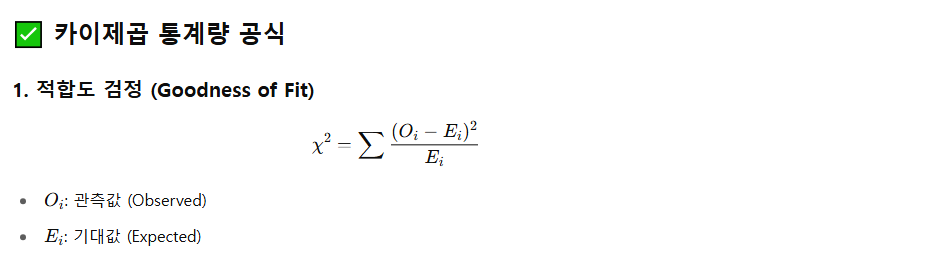

In [10]:
# 카이제곱 확률 테이블
from scipy.stats import chi2

# 예: 통계량이 11.07이고 자유도는 5일 때
chi2_stat = 11.07
df = 5

# 우측 누적 확률 (p-value)
p_value = 1 - chi2.cdf(chi2_stat, df)

print(f"p-value: {p_value:.4f}")

p-value: 0.0500


In [11]:
import numpy as np
from scipy.stats import chi2
# 주사위를 60번 던졌을 때, 1 ~ 6이 나온 횟수

# 관측값
observed = np.array([5, 9, 10, 11, 12, 13])
# 기대값 (공정한 주사위라면 각 면이 10번 나와야 함)
expected = np.array([10, 10, 10, 10, 10, 10])

chi_squared_stat = np.sum((observed - expected) ** 2 / expected)

print(f"Chi-squared Statistic: {chi_squared_stat:.4f}")

# 자유도
df = 5

# p-value 계산 (우측 누적 확률)
p_value = 1 - chi2.cdf(chi_squared_stat, df)

print(f"p-value: {p_value:.4f}")

Chi-squared Statistic: 4.0000
p-value: 0.5494


In [8]:
import scipy.stats as stats

# 카이제곱 통계량과 p-value 계산
chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

print(f"Chi-squared Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# 결과 해석
alpha = 0.05
if p_value < alpha:
    print("귀무가설 기각: 주사위는 공정하지 않다.")
else:
    print("귀무가설 채택: 주사위는 공정하다.")

Chi-squared Statistic: 4.0000
P-value: 0.5494
귀무가설 채택: 주사위는 공정하다.


In [26]:
from scipy.stats import chi2

observed = np.array([107, 198, 192, 125, 132, 248])
expected = np.array([167, 167, 167, 167, 167, 167])

df = 5
alpha = 0.01

critical_value = chi2.ppf(1 - alpha, df)
print(f"유의수준 1%에서의 임계값: {critical_value:.4f}")

chi_squared_stat = np.sum((observed - expected) ** 2 / expected)
print(f"Chi-squared Statistic: {chi_squared_stat:.4f}")
# chi_squared_stat은 critical_value보다 크기 때문에, 검정통계가 기각역 안에 있다.
# 주사위는 공정하지 않다.

유의수준 1%에서의 임계값: 15.0863
Chi-squared Statistic: 88.2395


In [27]:
chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)
chi2_stat, p_value

(88.23952095808383, 1.5740730408691192e-17)

In [ ]:
# A, B, C 독립성 검정
# H0 : 아무 관계가 없다.
# H1 : 관계가 있다.

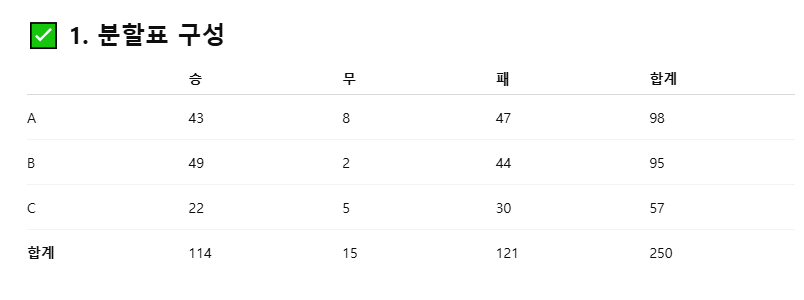

In [29]:
# 카이제곱 검정통계를 계산하려면 기대도수가 필요
# P(A) = A의 총합 / 전체 총합
# P(A 승리) = (승리 총합 / 전체 총합) * (A의 총합 / 전체 총합) 
# 기대도수 = 전체총합 * P(A 승리) = (승리 총합 * A의 총합) / 전체 총합

total = 250
win_total = 114
A_total = 98

A_win = (win_total * A_total) / total # A 승리에 대한 기대도수

44.688

In [41]:
observed = np.array([43, 8, 47, 49, 2, 44, 22, 5, 30])
expected = np.array([44.688, 5.88, 47.432, 43.32, 5.7, 45.98, 25.992, 3.42, 27.588])

sum(((observed - expected) ** 2) / expected)

5.617747972948175

In [28]:
import numpy as np
from scipy.stats import chi2_contingency

# 분할표: 행 = A, B, C / 열 = 승, 무, 패
observed = np.array([
    [43, 8, 47],
    [49, 2, 44],
    [22, 5, 30]
])

# 카이제곱 독립성 검정
chi2_stat, p_value, dof, expected = chi2_contingency(observed)

print(f"Chi-squared Statistic: {chi2_stat:.4f}")
print(f"Degrees of Freedom: {dof}") # 3x3 기대도수에서 2x2만 계산하면 나머지는 총합에 맞춰서 구할 수 있음, 자유도 = 4
print(f"P-value: {p_value:.4f}")

Chi-squared Statistic: 5.6177
Degrees of Freedom: 4
P-value: 0.2296


In [35]:
import numpy as np
from scipy.stats import chi2_contingency

# 분할표: 행 = A, B, C / 열 = 승, 무, 패
observed = np.array([
    [375, 367, 357],
    [379, 336, 362],
    [46, 37, 41]
])

# 카이제곱 독립성 검정
chi2_stat, p_value, dof, expected = chi2_contingency(observed)

print(f"Chi-squared Statistic: {chi2_stat:.4f}")
print(f"Degrees of Freedom: {dof}") # 3x3 기대도수에서 2x2만 계산하면 나머지는 총합에 맞춰서 구할 수 있음, 자유도 = 4
print(f"P-value: {p_value:.4f}")

Chi-squared Statistic: 1.6273
Degrees of Freedom: 4
P-value: 0.8039
